#In this excercise, you will investigate multivariate linear regression using gradient descent and the normal equations. We also will examine the relationship between the cost function $J(\theta)$ the convergence of gradient descent and the learning rate $\alpha$

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import os
import string

#As ex3x.dat taken as plain text file and has 3 spaces at each data line we use below code to read and convert

In [31]:
with open('./ex3Data/ex3x.dat','r') as f:
    df = pd.DataFrame(l.lstrip().split() for l in f)
df = df.values.astype(float)

#loading the data into df_x and set the $x_0=1$

In [3]:
df_x=np.insert(df,0,1,axis=1)

#Take a look at the values of the input $x^{(i)}$ and note the living areas are about 1000 times the number of bedrooms. We need rescale the two featues by their standard deviations to one and set their means to zero

In [4]:
std_1=np.std(df_x[:,1])
mean_1=np.mean(df_x[:,1])
std_2=np.std(df_x[:,2])
mean_2=np.mean(df_x[:,2])

In [5]:
df_x[:,1]=(df_x[:,1]-mean_1)/std_1
df_x[:,2]=(df_x[:,2]-mean_2)/std_2

In [6]:
print(np.mean(df_x[:,1]))
print(np.mean(df_x[:,2]))
print(np.std(df_x[:,1]))
print(np.std(df_x[:,2]))

9.44870659255e-18
2.71059770374e-16
1.0
1.0


In [12]:
df_y=pd.read_csv('./ex3Data/ex3y.dat',names=['y'])

In [13]:
y=df_y.values[:,0]
x=df_x
print y.shape
print x.shape

(47L,)
(47L, 3L)


We set the hypothesis function is still $$h_\theta(x)=\theta^Tx=\sum_{i=0}^n\theta_ix_i$$ and the batch gradient descent update rule is $$\theta_j:=\theta_j-\alpha\frac 1m\sum_{i=1}^m(h_\theta(x^{(i)}-y^{(i)})x_j^{(i)}$$ (for all j), once again, initialize your parameters to $\theta=\vec0$
Recall that the cost function is defined as $$J(\theta)=\frac 1{2m}\sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})^2$$
The cost function can also be written in the following vectorized form, $$J(\theta)=\frac 1{2m}(X\theta-\vec y)^T(X\theta-\vec y)$$
Also the $\theta$ update rule can be written in the vectorized form as $$\theta=\theta-\alpha\frac 1m{X^T}(X\theta-\vec y)$$ and we call $\alpha$ learning rate and $\frac 1m{X^T}(X\theta-\vec y)$ is $Gradient$.
So we can program to calcuate the cost $J$ and $\theta$ at each iteration

In [11]:
def batch_gradient_plot(xx,yy,lrate,linetypes,size):
    alpha=lrate #we set the learining rate as a list contains diferent learning rate to inspect which one is the best
    linestyle=linetypes #we set the plot linestyle
    m=size #m is the sample dataset size
    
    for i in range(len(alpha)):
        theta = np.zeros(xx.shape[1]) #we initialize the theta as zeros vector
        J_iterations=np.zeros(100) #we set the list to save cost J on each iteration
        for j in range(len(J_iterations)):
            #calcuate the cost J
            J_iterations[j]=(0.5/m)*np.dot((np.dot(xx,theta)-yy),(np.dot(xx,theta)-yy))
            
            #calculate the gradient
            gradient = (1.0/m)*(np.dot((np.dot(xx,theta)-yy),xx))
        
            #calculate the theta
            theta=theta-alpha[i]*gradient
        plt.title("Cost J vs. Iterations")
        plt.plot(range(len(J_iterations)),J_iterations,linestyle[i],label=str(alpha[i]))
        plt.xlabel("Number of iteration")
        plt.ylabel("Cost J")
        plt.legend(loc="upper right")

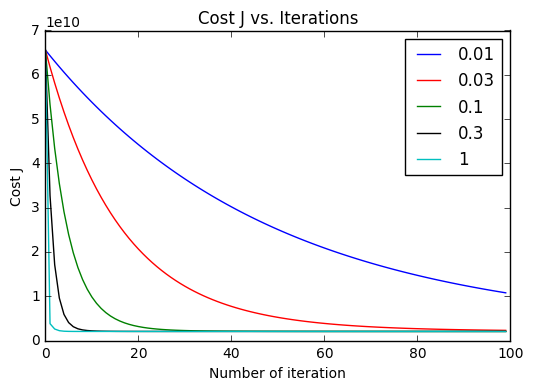

In [12]:
learningrate=[0.01, 0.03, 0.1, 0.3, 1]
linestyle = ['b', 'r', 'g', 'k', 'c']
m=len(y)
batch_gradient_plot(x,y,learningrate,linestyle,m)

By looking into above analysis, notice that for a small learning rate $\alpha$ like 0.01, the cost function $J$ decreases slowly, which means slow converegence during gradient descent. Also we can see if learning rate $\alpha=1.0$ will have the fastest convergence. But if we continue increasing $\alpha$ the speed of convergence will still increase? Let's increase the $\alpha$ a little bit to 1.3 to see

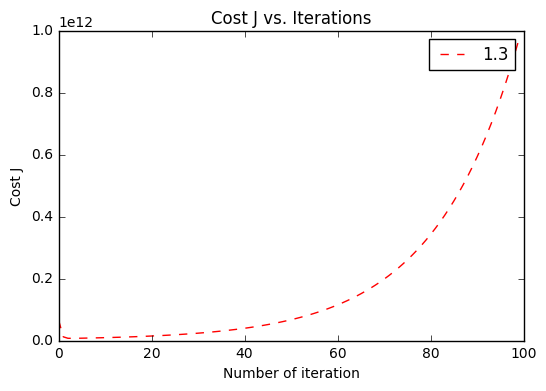

In [64]:
learningrate=[1.3]
linestyle = ['r--']
m=len(y)
batch_gradient_plot(x,y,learningrate,linestyle,m)

Apparently learning rate $\alpha=1.3$ will NOT cause the algorithm convergence. This shows that after a certain point, increasing the learning rate $\alpha$ will no longer increase the speed of convergence.

As we see the learning rate $\alpha=1.0$ is the best one we can extract the fitting parameter $\theta$ to build our predict modle.

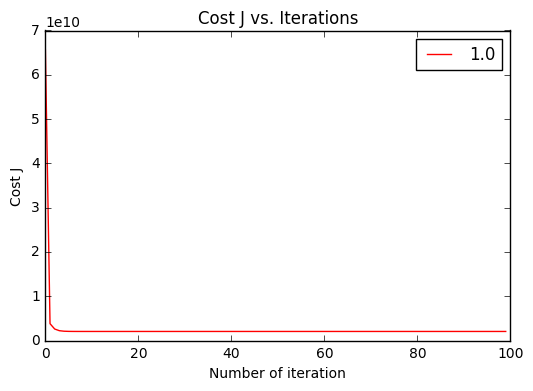

In [14]:
learningrate=[1.0]
linestyle = ['r-']
m=len(y)
batch_gradient_plot(x,y,learningrate,linestyle,m)

# Normal Equation

Normal Equation
Since we can write the cost function $J(\theta)$ as $$J(\theta)=\frac 12\sum_{i=1}^m(h_\theta(x^{(i)}-y^{(i)})^2$$    $$=\frac 12(X\theta-\vec y)^T(X\theta-\vec y)$$ To minimize $J$, lets find its derivatives with respect to $\theta$. Hence, $$\nabla_\theta{J(\theta)}=\nabla_\theta\frac 12(X\theta-\vec y)^T(X\theta-\vec y)$$ $$=\frac 12\nabla_\theta{(\theta^TX^TX\theta-\theta^TX^T\vec y-\vec y^TX\theta+\vec y^T\vec y)}$$ $$=\frac 12\nabla_\theta{tr(\theta^TX^TX\theta-\theta^TX^T\vec y-\vec y^TX\theta+\vec y^T\vec y)}$$ $$=\frac 12\nabla_\theta{(tr\theta^TX^TX\theta-2tr\vec y^TX\theta)}$$ $$=\frac 12{(X^TX\theta+X^TX\theta-2X^T\vec y)}$$ $$=X^TX\theta-X^T\vec y$$ To minimize the $J(\theta)$,we set its derivatives to zero, and obtain the Normal Equation: $$X^TX\theta=X^T\vec y$$ Thus, the value of \theta that minimizes $J(\theta)$ is given in closed form by the equation $$\theta=(X^TX)^{-1}X^T\vec y$$ Lets use the normal equation to get the $\theta$ then predict the house price.

In [32]:
df=np.insert(df,0,1,axis=1)
A=np.linalg.inv(np.dot(df.T,df))
B=np.dot(df.T,y)
theta_normal=np.dot(A,B)
print theta_normal

[ 89597.9095428     139.21067402  -8738.01911233]


In [35]:
predict_house_price=np.dot(theta_normal,np.array([1,1650,3]))
print predict_house_price

293081.464335
